In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy

In [5]:
df = pd.read_csv("radiomics_results_2.csv")
df.head()

,ID,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,...,wavelet-LL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-LL_gldm_LowGrayLevelEmphasis,wavelet-LL_gldm_SmallDependenceEmphasis,wavelet-LL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LL_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-LL_ngtdm_Busyness,wavelet-LL_ngtdm_Coarseness,wavelet-LL_ngtdm_Complexity,wavelet-LL_ngtdm_Contrast,wavelet-LL_ngtdm_Strength
0,benign (1),3.1.1.dev111+g8ed579383,2.2.6,2.5.3,1.8.0,3.10.15,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {'binWidth': 10}}",b75398d30def14870daaa168e56cbc7789e352d0,2D,...,0.300270,0.020780,0.332462,104.058703,0.004744,0.094129,0.023505,762.413158,0.053761,32.364518
1,benign (2),3.1.1.dev111+g8ed579383,2.2.6,2.5.3,1.8.0,3.10.15,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {'binWidth': 10}}",2bbdb00f7b8c34147af0b4ea299017b66842b066,2D,...,0.666461,0.025902,0.130143,23.108968,0.002462,0.529252,0.003637,554.771433,0.011522,7.681420
2,benign (3),3.1.1.dev111+g8ed579383,2.2.6,2.5.3,1.8.0,3.10.15,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {'binWidth': 10}}",0436de8220841b51ba2de6f8a868fc92dd66e26b,2D,...,0.513521,0.017147,0.137377,40.494667,0.001593,0.409644,0.005844,314.747802,0.022609,5.344522
3,benign (4),3.1.1.dev111+g8ed579383,2.2.6,2.5.3,1.8.0,3.10.15,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {'binWidth': 10}}",fb85e2002121a80c0f81082f895fbd29ea1c5032,2D,...,0.203079,0.013470,0.294884,108.234988,0.002648,0.082245,0.017444,467.422461,0.034154,13.285656
4,benign (5),3.1.1.dev111+g8ed579383,2.2.6,2.5.3,1.8.0,3.10.15,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {'binWidth': 10}}",a71dd4a2796a34dd5213f1820e797dc597467c76,2D,...,0.270057,0.016719,0.312729,118.312768,0.004042,0.310594,0.006481,1150.226379,0.083989,7.541387


In [7]:
df["label"] = df["ID"].apply(lambda x: 0 if "benign" in x.lower() else 1)

# Remove diagnostic columns-Radiomics generates many "diagnostics_" columns that contain metadata, not features
df = df.loc[:, ~df.columns.str.startswith("diagnostics_")]

# Prepare X and y
y = df["label"] # target variable x and y
X = df.drop(columns=["ID", "label"]) # all radiomics features.

print(df.shape)

(645, 476)


Number of features: 453
(453, 453)


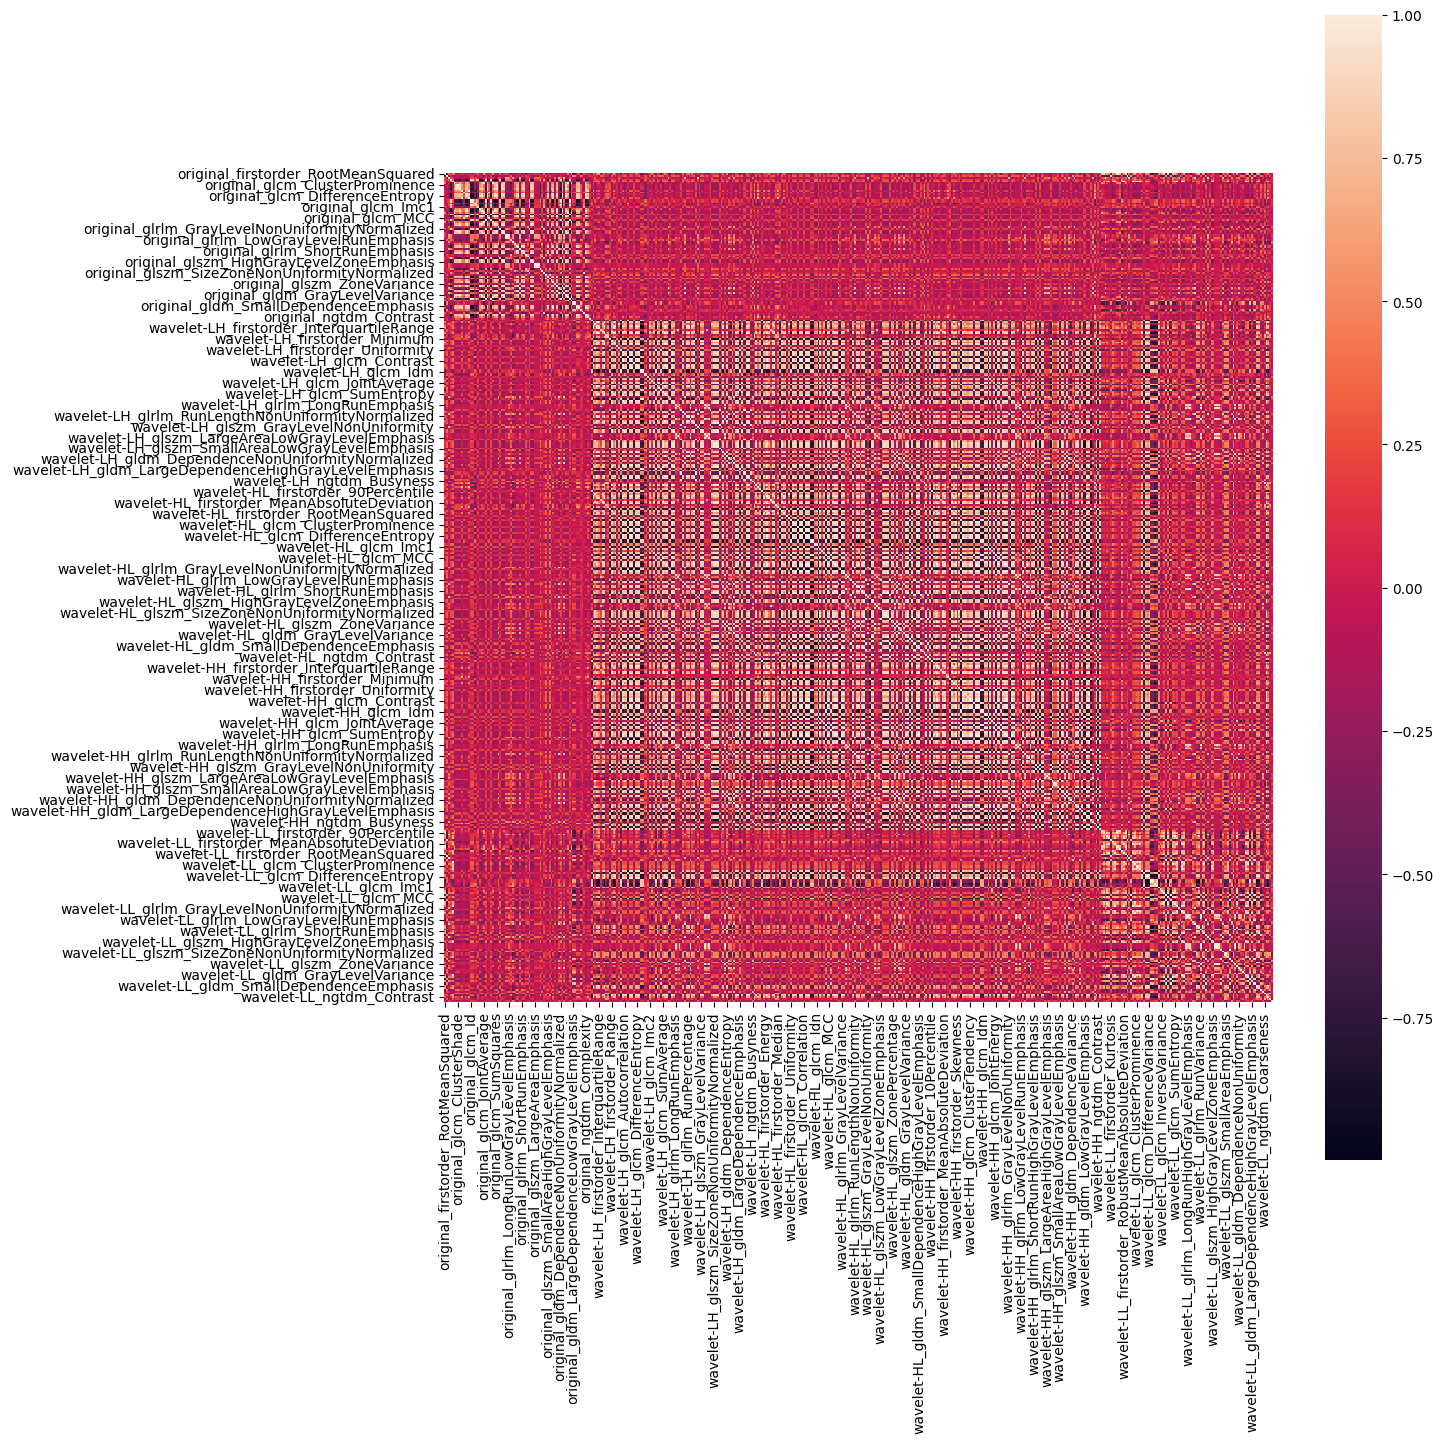

In [8]:
corr = df.iloc[:, 23:].corr()
print(f"Number of features: {df.iloc[:,23:].shape[1]}")
print(corr.shape)

plt.figure(figsize=(15,15))
sns.heatmap(corr, square=True)
plt.tight_layout()
plt.show()

/Users/abby/miniforge3/envs/radiomics/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/abby/miniforge3/envs/radiomics/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


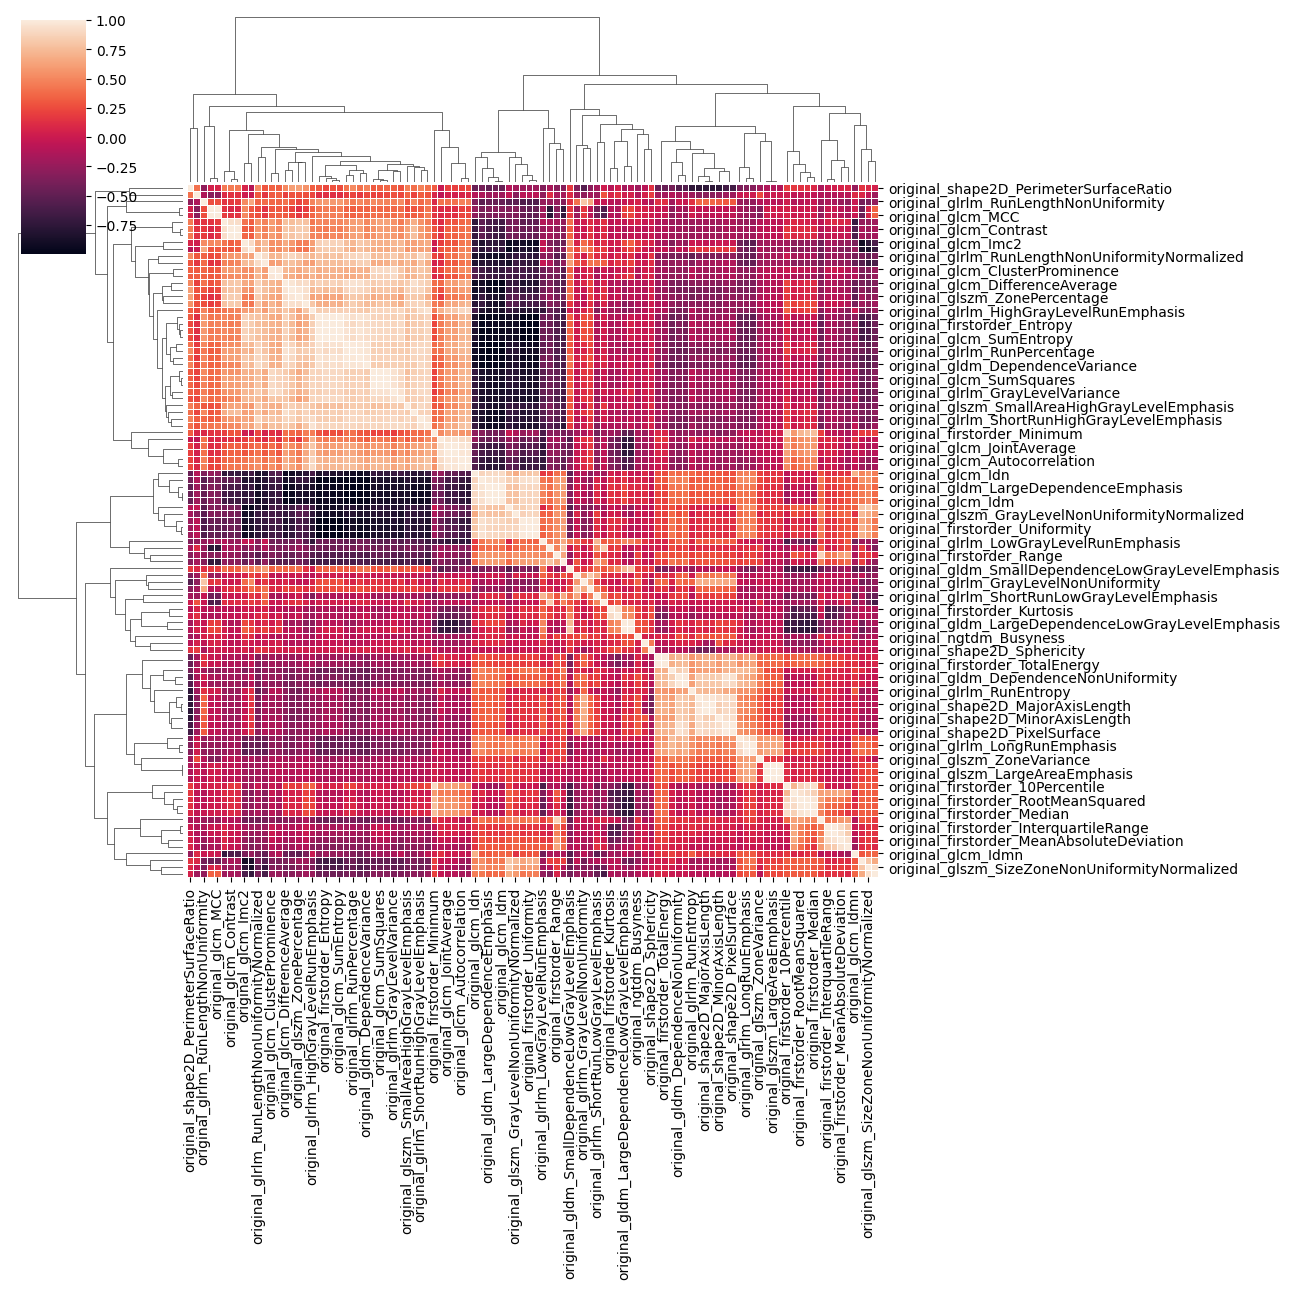

In [5]:
pp = sns.clustermap(corr, linewidths=.5, figsize=(13,13))
_ = plt.setp(pp.ax_heatmap.get_yticklabels(), rotation=0)

plt.show()